In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler

In [16]:
# Loading data
file_path = Path("Superstore_merged_clean.csv")
Superstore = pd.read_csv(file_path)
Superstore.head()

,Row ID,Order ID,Order Date,Order Quantity,Sales,Discount,Profit,Unit Price,Customer Name,Country,Region,Customer Segment,Product Category,Product Sub-Category,Product Name
0,43,4132,5/28/2011,5,14.76,0.01,1.32,2.88,Aaron Bergman,CAN,Nunavut,Corporate,Office Supplies,Labels,Avery 49
1,8234,20513,7/7/2009,13,42.27,0.01,4.56,2.84,Aaron Bergman,CAN,West,Corporate,Office Supplies,Pens & Art Supplies,SANFORD Liquid Accent� Tank-Style Highlighters
2,8300,36262,7/27/2010,23,164.02,0.03,-47.64,6.68,Aaron Bergman,CAN,West,Corporate,Office Supplies,Paper,Xerox 1968
3,8301,36262,7/27/2010,23,136.81,0.01,-30.51,5.68,Aaron Bergman,CAN,West,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Acme� Preferred Stainless Steel Scissors
4,8302,36262,7/27/2010,26,4701.69,0.00,1148.90,205.99,Aaron Bergman,CAN,West,Corporate,Technology,Telephones and Communication,V70


In [17]:
Superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                18393 non-null  int64  
 1   Order ID              18393 non-null  object 
 2   Order Date            18393 non-null  object 
 3   Order Quantity        18393 non-null  int64  
 4   Sales                 18393 non-null  float64
 5   Discount              18393 non-null  float64
 6   Profit                18393 non-null  float64
 7   Unit Price            18393 non-null  float64
 8   Customer Name         18393 non-null  object 
 9   Country               18393 non-null  object 
 10  Region                18393 non-null  object 
 11  Customer Segment      18393 non-null  object 
 12  Product Category      18393 non-null  object 
 13  Product Sub-Category  18393 non-null  object 
 14  Product Name          18393 non-null  object 
dtypes: float64(4), int6

In [18]:
Superstore_agg = Superstore.groupby('Customer Name').sum()

Superstore_agg


,Row ID,Order Quantity,Sales,Discount,Profit,Unit Price
Customer Name,,,,,,
Aaron Bergman,100244,181,12516.7460,0.63,3155.1865,824.474
Aaron Hawkins,155507,424,29435.4255,1.68,6326.6252,1537.064
Aaron Smayling,124661,351,11886.0155,4.15,1860.8254,1459.530
Adam Bellavance,225496,389,19333.2000,1.34,1872.6485,2345.278
Adam Hart,355455,581,29364.6015,4.17,4353.0290,2571.345
...,...,...,...,...,...,...
Xylona Price,56614,374,18037.0855,0.60,1124.2200,764.600
Yana Sorensen,130792,211,8707.6040,0.82,1516.7623,1350.620
Yoseph Carroll,141169,307,15989.6680,1.09,2050.2990,1916.154


In [61]:
Superstore_aggProduct = Superstore.groupby('Product Sub-Category').sum()
Superstore_aggProduct

,Row ID,Order Quantity,Sales,Discount,Profit,Unit Price
Product Sub-Category,,,,,,
Accessories,6508450,2976,1.673803e+05,60.80,41936.6357,42901.3880
Appliances,5713317,12630,8.445237e+05,99.58,115296.0654,59773.9750
Art,6684808,3000,2.711879e+04,59.60,6527.7870,7019.1880
Binders,12790154,5974,2.034127e+05,567.00,30221.7633,55851.8810
Binders and Binder Accessories,3761415,22992,1.022958e+06,46.10,307413.3900,52706.1800
Bookcases,2702712,5759,9.375320e+05,57.23,-37054.6860,62556.6346
Chairs,5181566,2356,3.284491e+05,105.00,26590.1663,85641.1250
Chairs & Chairmats,1483623,9590,1.761837e+06,19.42,149649.7300,70691.1300
Computer Peripherals,3125846,19222,7.958759e+05,36.82,94287.4800,32218.2300


In [62]:
Superstore_aggProduct = Superstore_aggProduct.drop(columns=['Row ID'])

In [63]:
Superstore_aggProduct = pd.get_dummies(Superstore_aggProduct)

In [64]:
# Initializing model with K = 3 
model = KMeans(n_clusters=3, random_state=5)

In [65]:
model.fit(Superstore_aggProduct)

KMeans(n_clusters=3, random_state=5)

In [67]:
# Get predictions
predictions = model.predict(Superstore_aggProduct)
print(predictions)

[0 2 0 0 2 2 0 1 2 0 2 0 0 0 0 0 2 1 0 0 0 0 0 0 2 0 1 1]


In [68]:
Superstore_aggProduct["class"] = model.labels_
Superstore_aggProduct.head()

,Order Quantity,Sales,Discount,Profit,Unit Price,class
Product Sub-Category,,,,,,
Accessories,2976,167380.318,60.80,41936.6357,42901.388,0
Appliances,12630,844523.701,99.58,115296.0654,59773.975,2
Art,3000,27118.792,59.60,6527.7870,7019.188,0
Binders,5974,203412.733,567.00,30221.7633,55851.881,0
Binders and Binder Accessories,22992,1022957.590,46.10,307413.3900,52706.180,2


C:\MyPrograms\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


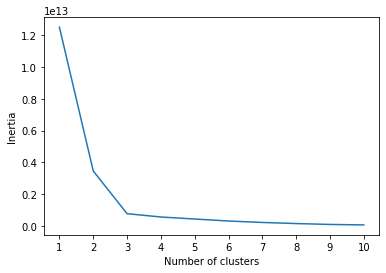

In [69]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(Superstore_aggProduct)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data_agg_Product = {"k": k, "inertia": inertia}
df_elbow_agg_Product = pd.DataFrame(elbow_data_agg_Product)

plt.plot(df_elbow_agg_Product['k'], df_elbow_agg_Product['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig('Superstore_MLelbowProduct.png')

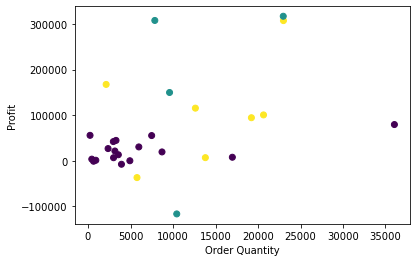

In [72]:
#agg
plt.scatter(x=Superstore_aggProduct["Order Quantity"], y=Superstore_aggProduct['Profit'], c=Superstore_aggProduct['class'])
plt.xlabel('Order Quantity')
plt.ylabel('Profit')
plt.savefig("SuperstoreScatteraggProductQuantity.png")

In [48]:
Superstore_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 834 entries, Aaron Bergman to Zuschuss Donatelli
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          834 non-null    int64  
 1   Order Quantity  834 non-null    int64  
 2   Sales           834 non-null    float64
 3   Discount        834 non-null    float64
 4   Profit          834 non-null    float64
 5   Unit Price      834 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 45.6+ KB


In [49]:
Superstore_agg = Superstore_agg.drop(columns=['Row ID'])

In [50]:
Superstore_agg = pd.get_dummies(Superstore_agg)

In [51]:
# Initializing model with K = 3 
model = KMeans(n_clusters=3, random_state=5)

In [52]:
model.fit(Superstore_agg)

KMeans(n_clusters=3, random_state=5)

In [19]:
Superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                18393 non-null  int64  
 1   Order ID              18393 non-null  object 
 2   Order Date            18393 non-null  object 
 3   Order Quantity        18393 non-null  int64  
 4   Sales                 18393 non-null  float64
 5   Discount              18393 non-null  float64
 6   Profit                18393 non-null  float64
 7   Unit Price            18393 non-null  float64
 8   Customer Name         18393 non-null  object 
 9   Country               18393 non-null  object 
 10  Region                18393 non-null  object 
 11  Customer Segment      18393 non-null  object 
 12  Product Category      18393 non-null  object 
 13  Product Sub-Category  18393 non-null  object 
 14  Product Name          18393 non-null  object 
dtypes: float64(4), int6

In [53]:
# Get predictions
predictions = model.predict(Superstore_agg)
print(predictions)

[1 2 1 1 2 2 2 1 1 1 1 2 2 2 0 1 1 0 1 2 2 2 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 2 1 1 2 1 2 2 2 1 2 1 1 1 2 1 1 0
 1 2 1 1 2 1 2 0 1 1 2 2 1 2 1 1 1 2 2 2 2 2 1 2 2 1 2 1 1 2 2 1 1 2 1 2 2
 1 1 1 1 2 1 2 2 2 1 1 1 1 2 1 1 2 0 1 1 1 2 2 2 0 1 1 1 2 1 1 2 1 2 1 1 2
 2 2 1 1 1 2 1 1 2 1 1 2 2 1 1 2 2 2 1 2 2 1 2 2 2 1 1 1 1 1 2 1 1 0 1 2 1
 1 2 2 1 2 2 1 1 1 1 2 2 1 1 2 2 2 1 2 1 1 1 2 0 1 1 1 2 1 1 2 2 2 1 1 1 1
 1 1 1 1 2 1 2 0 1 1 1 1 2 1 0 2 1 2 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 2 2 2
 0 1 1 2 2 0 1 2 1 2 1 1 2 2 0 2 1 1 0 1 1 2 1 2 2 1 1 2 2 2 2 1 1 1 2 1 1
 1 2 2 1 1 1 1 2 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 0 1 1 0 1 2 2 1 1 2 2 1 1 1
 1 2 0 2 2 1 2 1 2 1 2 0 1 2 1 1 2 1 2 2 2 1 2 1 0 0 2 2 1 2 1 2 2 1 2 2 1
 1 2 0 1 2 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 2 2 2 2 1 2 2 2 1 1 1 1 2 1 1 1 2
 0 2 0 2 1 2 1 1 2 1 2 1 1 2 0 2 2 0 1 2 2 1 2 1 1 2 1 1 1 0 2 2 2 1 2 2 1
 1 2 2 2 1 2 1 1 1 2 1 1 1 1 1 1 2 2 2 2 2 1 2 1 1 1 1 2 2 1 2 2 2 2 1 0 1
 1 1 2 2 1 1 0 1 1 1 0 1 

In [54]:
# Add a new class column to customers
Superstore_agg["class"] = model.labels_
Superstore_agg.head()

,Order Quantity,Sales,Discount,Profit,Unit Price,class
Customer Name,,,,,,
Aaron Bergman,181,12516.7460,0.63,3155.1865,824.474,1
Aaron Hawkins,424,29435.4255,1.68,6326.6252,1537.064,2
Aaron Smayling,351,11886.0155,4.15,1860.8254,1459.530,1
Adam Bellavance,389,19333.2000,1.34,1872.6485,2345.278,1
Adam Hart,581,29364.6015,4.17,4353.0290,2571.345,2


C:\MyPrograms\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


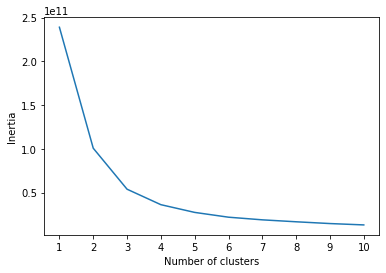

In [55]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(Superstore_agg)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data_agg = {"k": k, "inertia": inertia}
df_elbow_agg = pd.DataFrame(elbow_data_agg)

plt.plot(df_elbow_agg['k'], df_elbow_agg['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig('Superstore_MLelbow.png')

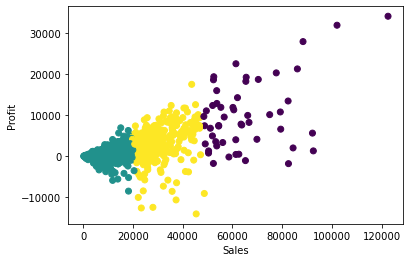

In [56]:
#agg
plt.scatter(x=Superstore_agg["Sales"], y=Superstore_agg['Profit'], c=Superstore_agg['class'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.savefig("SuperstoreScatteragg.png")

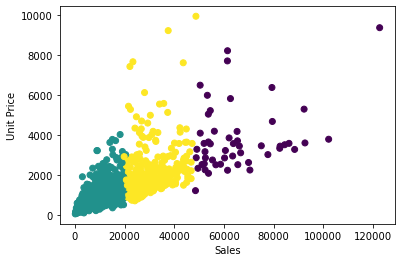

In [57]:
#agg
plt.scatter(x=Superstore_agg["Sales"], y=Superstore_agg['Unit Price'], c=Superstore_agg['class'])
plt.xlabel('Sales')
plt.ylabel('Unit Price')
plt.savefig("SuperstoreScatterUnit.png")

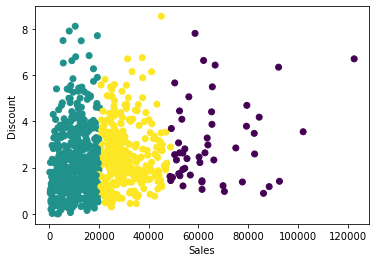

In [58]:
#agg
plt.scatter(x=Superstore_agg["Sales"], y=Superstore_agg['Discount'], c=Superstore_agg['class'])
plt.xlabel('Sales')
plt.ylabel('Discount')
plt.savefig("SuperstoreScatterDiscount.png")

In [20]:
Superstore_ML = Superstore.drop(columns=['Row ID', 'Order Date'])

In [21]:
Superstore_ML = pd.get_dummies(Superstore_ML)

In [35]:
Superstore_ML = Superstore_ML.drop(columns=['Product Name_Canon imageCLASS 2200 Advanced Copier'])

In [36]:
Superstore_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Columns: 13776 entries, Order Quantity to class
dtypes: float64(4), int32(1), int64(1), uint8(13770)
memory usage: 242.3 MB


In [37]:
# Initializing model with K = 3 
model = KMeans(n_clusters=3, random_state=5)

In [38]:
model.fit(Superstore_ML)

KMeans(n_clusters=3, random_state=5)

In [39]:
# Get predictions
predictions = model.predict(Superstore_ML)
print(predictions)

[0 0 0 ... 0 0 0]


In [40]:
# Add a new class column to customers
Superstore_ML["class"] = model.labels_
Superstore_ML.head()

,Order Quantity,Sales,Discount,Profit,Unit Price,Order ID_10022,Order ID_10048,Order ID_10052,Order ID_10053,Order ID_10054,...,Product Name_iDEN i550,Product Name_iDEN i95,Product Name_iDENi80s,Product Name_iHome FM Clock Radio with Lightning Dock,"Product Name_iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",Product Name_iOttie HLCRIO102 Car Mount,Product Name_iOttie XL Car Mount,Product Name_invisibleSHIELD by ZAGG Smudge-Free Screen Protector,Product Name_netTALK DUO VoIP Telephone Service,class
0,5,14.76,0.01,1.32,2.88,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,42.27,0.01,4.56,2.84,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23,164.02,0.03,-47.64,6.68,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,136.81,0.01,-30.51,5.68,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26,4701.69,0.00,1148.90,205.99,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


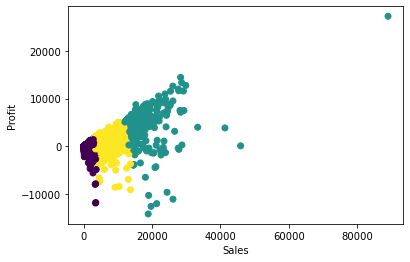

In [41]:
#Customer
plt.scatter(x=Superstore_ML["Sales"], y=Superstore_ML['Profit'], c=Superstore_ML['class'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.savefig("SuperstoreScatter.png")

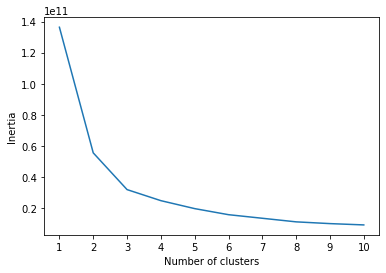

In [42]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(Superstore_ML)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig('Superstore_MLelbow.png')

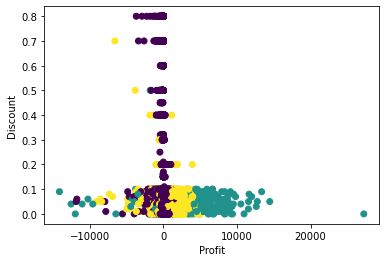

In [43]:
plt.scatter(x=Superstore_ML["Profit"], y=Superstore_ML['Discount'], c=Superstore_ML['class'])
plt.xlabel('Profit')
plt.ylabel('Discount')
plt.savefig("SuperstoreScatterDiscount.png")

In [44]:
Superstore_ML2 = pd.DataFrame(Superstore_ML)
def get_clusters(k, Superstore_ML2):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(Superstore_ML2)

    # Predict clusters
    predictions = model.predict(Superstore_ML2)

    # Create return DataFrame with predicted clusters
    Superstore_ML2["class"] = model.labels_

    return Superstore_ML2

In [45]:
clusters = get_clusters(3, Superstore_ML2)

In [46]:
def show_clusters(Superstore_ML2):
    plt.scatter(Superstore_ML2['Sales'], Superstore_ML2['Profit'], c=Superstore_ML2['class'])
    plt.xlabel('Sales')
    plt.ylabel('Profit')
    plt.show()

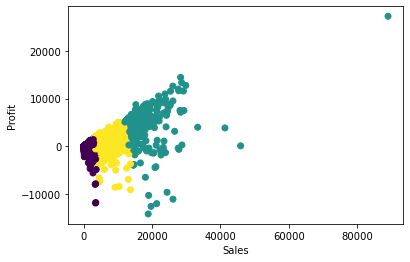

In [47]:
show_clusters(clusters)